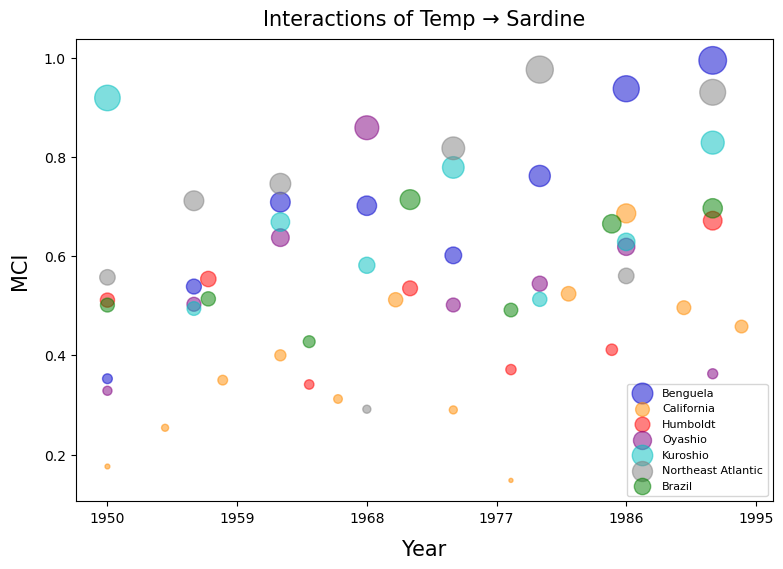

In [54]:
# Scatter Plot

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (9,6))
# Benguela
x = np.array([1950,1956,1962,1968,1974,1980,1986,1992])
y = np.array([0.352857143,0.538571429,0.708571429,0.701428571,0.601428571,0.761428571,0.937142857,0.994285714])
plt.scatter(x, y, color = 'mediumblue', s = (y*20)**2, alpha=0.5, label = 'Benguela')

# California
x = np.array([1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994])
y = np.array([0.176,0.254,0.35,0.4,0.312,0.512,0.29,0.148,0.524,0.686,0.496,0.458])
plt.scatter(x, y, color = 'darkorange', s = (y*20)**2, alpha=0.5, label = 'California')

# Humboldt
x = np.array([1950,1957,1964,1971,1978,1985,1992])
y = np.array([0.51125,0.55375,0.34125,0.535,0.37125,0.41125,0.67125])
plt.scatter(x, y, color = 'red', s = (y*20)**2, alpha=0.5, label = 'Humboldt')

# Oyashio
x = np.array([1950,1956,1962,1968,1974,1980,1986,1992])
y = np.array([0.328571429,0.502857143,0.637142857,0.858571429,0.501428571,0.544285714,0.618571429,0.362857143])
plt.scatter(x, y, color = 'purple', s = (y*20)**2, alpha=0.5, label = 'Oyashio')

# Kuroshio
x = np.array([1950,1956,1962,1968,1974,1980,1986,1992])
y = np.array([0.918571429,0.494285714,0.668571429,0.581428571,0.778571429,0.512857143,0.628571429,0.828571429])
plt.scatter(x, y, color = 'c', s = (y*20)**2, alpha=0.5, label = 'Kuroshio')

# Northeast Atlantic
x = np.array([1950,1956,1962,1968,1974,1980,1986,1992])
y = np.array([0.557142857,0.711428571,0.745714286,0.291428571,0.817142857,0.975714286,0.56,0.93])
plt.scatter(x, y, color = 'grey', s = (y*20)**2, alpha=0.5, label = 'Northeast Atlantic')

# Brazil
x = np.array([1950,1957,1964,1971,1978,1985,1992])
y = np.array([0.50125,0.51375,0.4275,0.71375,0.49125,0.665,0.69625])
plt.scatter(x, y, color = 'green', s = (y*20)**2, alpha=0.5, label = 'Brazil')

plt.title("Interactions of Temp → Sardine", pad = 10, fontsize = 15) # 设置标题

x_tick = np.linspace(1950,1995,6)
plt.xticks(x_tick,fontsize=10,color='#000000')

plt.xlabel("Year",labelpad = 10, fontsize = 15)
plt.ylabel("MCI",labelpad = 10, fontsize = 15)

plt.legend(loc = "lower right", fontsize = 8)

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import data
df_result = pd.read_excel(r'Humboldt-FAO.xlsx')
df_result = df_result.drop(columns=['region-FAO'])
df_result.set_index('year', inplace=True)
df_result.head()

,A.landing-sum,S.landing-sum,temp,sea_level
year,,,,
1952,16100,4400,18.032292,-0.011108
1953,37700,5200,19.927739,-0.010643
1954,44400,15500,17.589723,-0.010352
1955,66300,22200,16.857501,-0.010310
1956,130000,9100,18.270626,-0.010102


In [3]:
import ruptures as rpt

[1971, 1991, 2016]


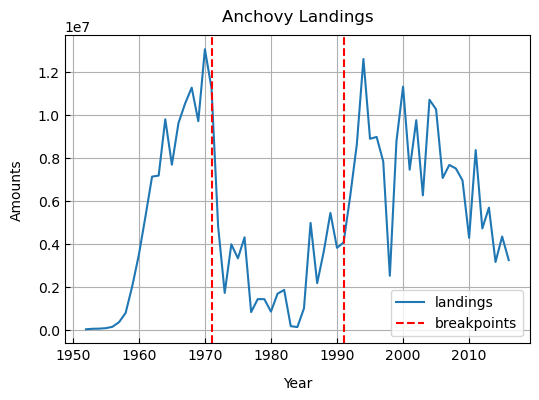

In [38]:
signal = np.array(df_result['A.landing-sum'])
model = rpt.Binseg(model="rbf").fit(signal)
n_breaks = 3
breaks = model.predict(n_bkps=n_breaks-1)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(df_result.index[i-1])
print(breaks_rpt)

plt.figure(figsize=(6,4))
plt.plot(df_result['A.landing-sum'], label='landings')
plt.title('Anchovy Landings',pad=10)
plt.xlabel('Year',labelpad=10)
plt.ylabel('Amounts',labelpad=10)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
print_legend = True
for i in breaks_rpt[:-1]:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breakpoints')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('Humboldt_A.pdf')
plt.show()

[1976, 1996, 2016]


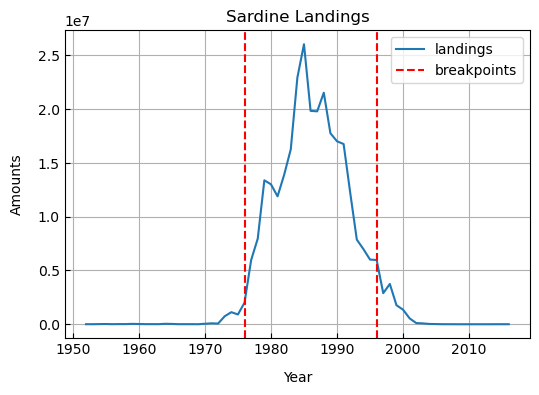

In [37]:
signal = np.array(df_result['S.landing-sum'])
model = rpt.Binseg(model="rbf").fit(signal)
n_breaks = 3
breaks = model.predict(n_bkps=n_breaks-1)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(df_result.index[i-1])
print(breaks_rpt)

plt.figure(figsize=(6,4))
plt.plot(df_result['S.landing-sum'], label='landings')
plt.title('Sardine Landings')
plt.xlabel('Year',labelpad=10)
plt.ylabel('Amounts',labelpad=10)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
print_legend = True
for i in breaks_rpt[:-1]:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breakpoints')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('Humboldt_S.pdf')
plt.show()

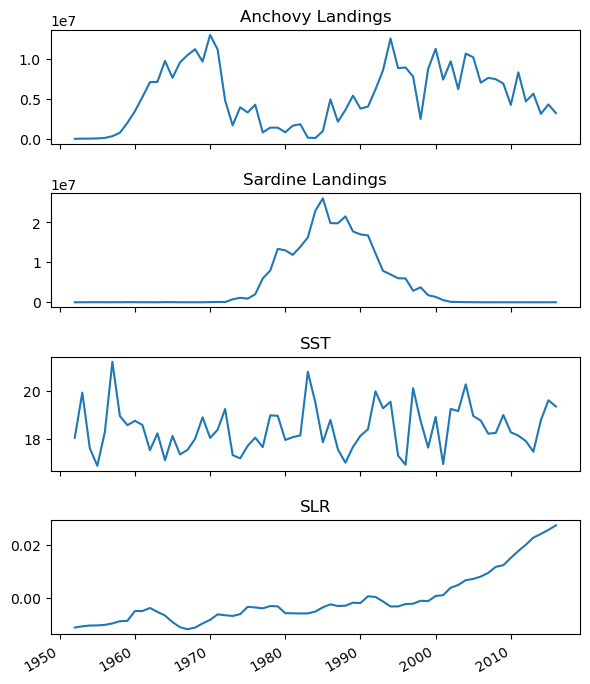

In [15]:
# 创建一个2x2的子图网格
fig, axs = plt.subplots(4, 1, figsize=(6, 8))

# 在第一个子图中绘制凤尾鱼上岸量
axs[0].plot(df_result.index, df_result['A.landing-sum'])
axs[0].set_title('Anchovy Landings')

# 在第二个子图中绘制沙丁鱼上岸量
axs[1].plot(df_result.index, df_result['S.landing-sum'])
axs[1].set_title('Sardine Landings')

# 在第三个子图中绘制海平面温度
axs[2].plot(df_result.index, df_result['temp'])
axs[2].set_title('SST')

# 在第四个子图中绘制海平面上升
axs[3].plot(df_result.index, df_result['sea_level'])
axs[3].set_title('SLR')

# 调整子图之间的间距和标签
fig.tight_layout()
fig.autofmt_xdate()

# 显示图形
plt.show()